#Ejercicios para Notebook 3



# Ejercicio 3.1
##### Estamos esperando algún tipo de correlación entre todos los factores relacionados a la acidez ("acidity") en el dataset "winequality-white" . Digamos que se considerarán "pH", "fixed acidity", "volatile acidity" y "citric acid".

#####. Hacer 3 boxplots independientes en el mismo output (resultado) para estas 3 variables para ver cómo se comportan individualmente.
#####. Hacer boxplots verticales para las mismas variables dentro del mismo plot (gráfico) para comparar.
#####. Graficar los mismos boxplots en escala logarítmica para ver si es posible distinguir mejor algunas diferencias menores.
#####Dataset URL: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv


In [ ]:
#TIPS:
#- Primero importar todos los módulos o librerías que se cree que se van a necesitar.
#- Crear un datafram a partir de la URL.
#- Modificar el dataframe para que incluya sólo las 3 variables que se quieren (Ver notebook 1 para ver cómo se hace esto)
#- Hacer los boxplots usando el método integrado de Pandas "df.plot", mostrarlos en una sola fila.
#- Hacer los boxplots de nuevo usando Seaborn para mostrarlos a ambos en el mismo gráfico y usando la misma escala.
#- Finalmente, hacer los gráficos logarítmicos en otra celda usando la misma librería. 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")

df1=df1[["pH", "fixed acidity", "volatile acidity", "citric acid"]]
df1

,pH,fixed acidity,volatile acidity,citric acid
0,3.00,7.0,0.27,0.36
1,3.30,6.3,0.30,0.34
2,3.26,8.1,0.28,0.40
3,3.19,7.2,0.23,0.32
4,3.19,7.2,0.23,0.32
...,...,...,...,...
4893,3.27,6.2,0.21,0.29
4894,3.15,6.6,0.32,0.36
4895,2.99,6.5,0.24,0.19
4896,3.34,5.5,0.29,0.30


pH                     AxesSubplot(0.125,0.125;0.168478x0.755)
fixed acidity       AxesSubplot(0.327174,0.125;0.168478x0.755)
volatile acidity    AxesSubplot(0.529348,0.125;0.168478x0.755)
citric acid         AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

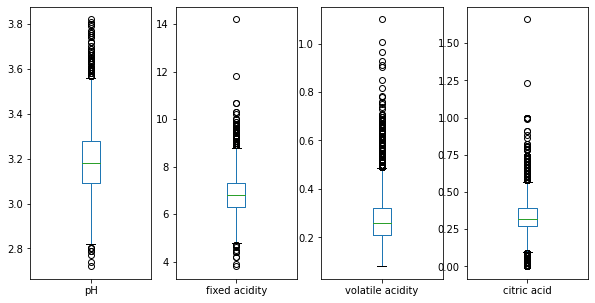

In [ ]:
df1.plot(kind='box',subplots=True,layout=(1,4),figsize=(10,5))

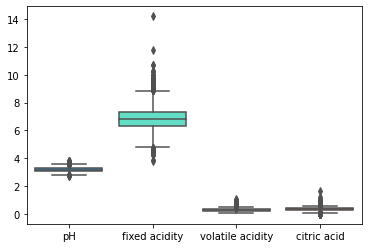

In [ ]:
ax = sns.boxplot(data=df1, orient="v", palette="rainbow")


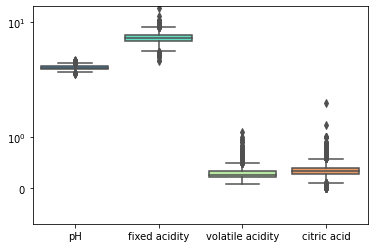

In [ ]:
ax = sns.boxplot(data=df1, orient="v", palette="rainbow")
ax.set_yscale('symlog')

#Ejercicio 3.2
##### Para este ejercicio, usar el dataframe que se usó en el ejercicio 3.1. Digamos que se quiere analizar cómo algún tipo de acidez en el dataset se correlaciona de alguna forma con el ácido cítrico.
##### - Hacer un pequeño heatmap para observar las diferentes correlaciones entre todas las variables.
##### - Elegir una correlación para ácido cítrico observando el heatplot, luego hacer un jointplot relacionando el contenido de ácido cítrico con algún tipo de acidez. Ver si vale la pena el esfuerzo.

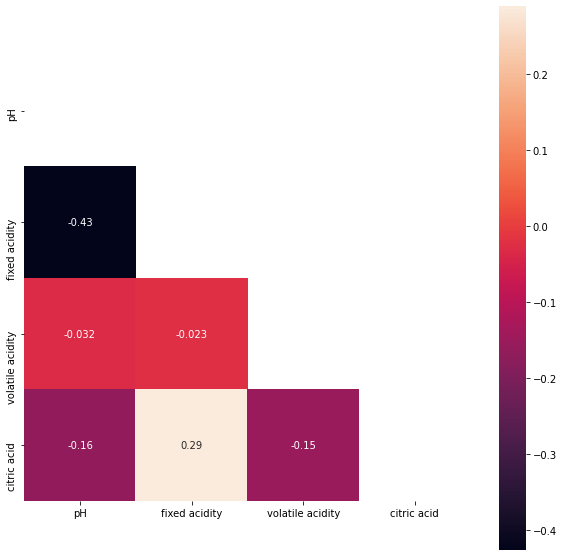

In [ ]:
import pandas as pd
import seaborn as sns

df1=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
# df1=df1[["chlorides", "sulphates", "density"]]
df1=df1[["pH", "fixed acidity", "volatile acidity", "citric acid"]]

import matplotlib.pyplot as plt
import numpy as np
correlation = df1.corr()
upper_triangle = np.triu(correlation)
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=upper_triangle,square=True,annot=True)

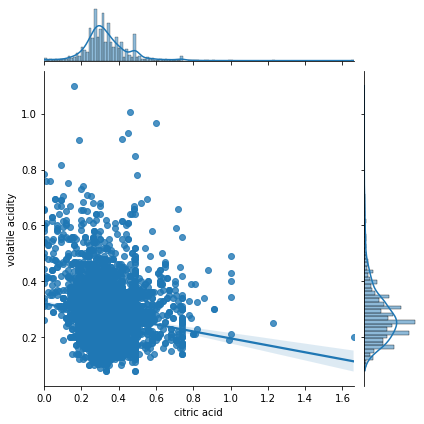

In [ ]:
joint_plt = sns.jointplot(y='volatile acidity', x='citric acid', data=df1, kind='reg')
#el parámetro kind='reg' es para poner la línea de tendencia de la regresión lineal

## Ejercicios avanzados / de investigación

---



##PCA (Principal Component Analysis)

Vamos a calcular un PCA, como el que se hizo en el Notebook 3, pero a mano, con operaciones matriciales.

NOTA: En cada consigna hay un par de tips. Sin embargo, se recomienda FUERTEMENTE consultar las documentaciones de:

[Numpy](https://https://numpy.org/doc/) para todo lo que sean operaciones con matrices.

[Pandas](https://https://pandas.pydata.org/docs/) para todo lo que sea manipulación de Dataframes.

[Python](https://https://docs.python.org/es/3/) para las funciones built-in de Python.

[Seaborn](https://https://seaborn.pydata.org/) para las visualizaciones del final.

---
Para empezar, se deberán importar los módulos:
* Numpy: para hacer operaciones con matrices
* Seaborn y Matplotlib: Para hacer las visualizaciones

Luego ambos datasets de vinos: El de vino tinto y el de vino blanco, después, agregarles a cada uno una nueva columna llamada "hue" o "color", que señale el color del vino (tinto o blanco) y concatenarlos.
Nombrar al nuevo dataset concatenado "df_wine".

(Esto está hecho en el Notebook 3, en la parte de reducción de variables.)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df['wine']='red'
df2=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
df2['wine']='white'


df_wine = pd.concat([df, df2], ignore_index=True)

df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


###Crear un nuevo dataframe con los datos normalizados:

* Generar una copia del dataframe concatenado, sacar las columnas "quality" (porque es una variable categórica) y "wine" (porque es la que quiero separar con PCA) con el método `.drop` . Llamarlo "data_PCA"

* **Normalizar los datos:** 
Calcular la media de data_pca (se la puede llamar "mean") y el desvío estándar de data_pca ( se lo puede llamar "std") luego, a data_pca restarle su media y dividir por su desvío estándar. Llamar al nuevo dataframe de datos normalizados "normalized_data_pca". Imprimir el nuevo dataframe en pantalla.

*TIPS:*
métodos útiles:

`df.copy()`

`df.drop()`

`df.mean()`

`df.std()`
Documentación de pandas: https://pandas.pydata.org/docs/


In [ ]:
data_pca = df_wine.copy()
data_pca = data_pca.drop(labels = ['quality', 'wine'],axis = 1)
mean=data_pca.mean()
std=data_pca.std()
normalized_data_pca=(data_pca-mean)/std
normalized_data_pca

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394
1,0.451001,3.281982,-2.192664,-0.597594,1.197883,-0.311296,-0.862402,0.701432,-0.115064,0.999502,-0.580023
2,0.451001,2.553104,-1.917405,-0.660648,1.026618,-0.874695,-1.092402,0.768128,0.258100,0.797897,-0.580023
3,3.073580,-0.362411,1.660957,-0.744721,0.541370,-0.762016,-0.986248,1.101609,-0.363840,0.327485,-0.580023
4,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394
...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783154,-0.787590,-0.197039,-0.807775,-0.486215,-0.367636,-0.420095,-1.186069,0.320294,-0.210128,0.593772
6493,-0.474615,-0.119451,0.284664,0.537383,-0.257863,1.491582,0.924517,0.067819,-0.426034,-0.478935,-0.747709
6494,-0.551750,-0.605370,-0.885185,-0.891847,-0.429127,-0.029596,-0.083942,-0.719196,-1.421138,-0.478935,-0.915394
6495,-1.323097,-0.301671,-0.128224,-0.912866,-0.971463,-0.592996,-0.101635,-2.003097,0.755652,-1.016548,1.935253


###Transformar el dataframe en una matriz para operar:
Transformar "normalized_data_pca" en una matriz (array) de numpy. Debería obtener una matriz de (n x 11), siendo n el número de muestras de vinos. Llamarla "**C**" (porque son mis datos **C**entrados) Asegurarse que **C** sea un array de n x 11.

*TIPS:*

método útil: `df.to_numpy()`

Documentación de Numpy: https://numpy.org/doc/

In [ ]:
C=normalized_data_pca.to_numpy()
print(C)
print(C.shape)

[[ 0.1424623   2.18866446 -2.19266376 ...  1.81294997  0.19308191
  -0.91539371]
 [ 0.45100101  3.28198234 -2.19266376 ... -0.11506417  0.99950169
  -0.58002349]
 [ 0.45100101  2.55310376 -1.9174051  ...  0.25809985  0.79789675
  -0.58002349]
 ...
 [-0.5517498  -0.60537011 -0.88518515 ... -1.42113827 -0.47893457
  -0.91539371]
 [-1.32309658 -0.3016707  -0.12822384 ...  0.75565189 -1.01654776
   1.93525315]
 [-0.93742319 -0.78758975  0.42229346 ...  0.25809985 -1.41975765
   1.0968276 ]]
(6497, 11)


###Matriz de Covarianza:
Con numpy, calcular la matriz de covarianza de $C^T$ (la matriz traspuesta de T). Llamar a la matriz de covarianza "**V**". 

$V = cov(C^T)$

**V** debería ser una matriz 11 x 11. Chequear que esto es así usando algún método visto en el notebook 2 .

La matriz de covarianza es una matriz cuadrada que me muestra las covarianzas entre las columnas de una matriz. (Recordar que la covarianza es el grado de variación conjunta de dos variables  respecto a sus medias.)

*TIPS*:

método útil: `np.cov(A)` <-- Genera la matriz de covarianza de A

Matriz traspuesta en numpy: $A^T$ = `A.T `

In [ ]:
V = np.cov(C.T)
V.shape

(11, 11)

###Autodescomposición de la matriz de covarianza:
Con numpy, calcular la descomposición de V. (autovectores y autovalores), y llamarlos "vectors" y "values" respectivamente.

Los autovectores representan las direcciones o componentes para el subespacio reducido al que quiero llegar, mientras que los autovalores representan las magnitudes para dichas direcciones. 

**values** debería ser un vector de 11 componentes y **vectors** una matriz de (n x 11). Chequear que esto sea así.

*TIPS:*

`np.linalg.eig(A)` me calcula la descommposición de la matriz A

Link útil: [esta sección de la documentación de Numpy]((https://https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html).)

In [ ]:
values, vectors = np.linalg.eig(V)
print(vectors)
print(values)


[[ 2.38798897e-01  3.36354536e-01 -4.34301304e-01 -3.34679266e-01
  -1.64346214e-01 -2.81267685e-01  3.44056674e-01  1.47480376e-01
   2.04553713e-01  4.01235645e-01 -2.83079440e-01]
 [ 3.80757499e-01  1.17549716e-01  3.07259420e-01 -8.47718098e-02
  -2.12784888e-01  1.52176731e-01 -4.96932675e-01 -1.51455988e-01
   4.92143072e-01 -8.74350885e-02 -3.89159756e-01]
 [-1.52388438e-01  1.83299403e-01 -5.90569674e-01  1.10895136e-03
   2.64300312e-01  2.34463340e-01 -4.02688676e-01  1.55348697e-01
  -2.27633798e-01 -2.93412336e-01 -3.81285036e-01]
 [-3.45919930e-01  3.29914181e-01  1.64688429e-01 -4.49765078e-01
  -1.67443015e-01 -1.37277329e-03  1.08003195e-01  3.53361853e-01
   2.33477754e-01 -5.24872935e-01  2.17975536e-01]
 [ 2.90112586e-01  3.15257992e-01  1.66791047e-02 -4.34375867e-02
   2.44743855e-01 -1.96630217e-01  2.96443716e-01 -6.14391068e-01
  -1.60976388e-01 -4.71516850e-01 -4.60681556e-02]
 [-4.30914008e-01  7.19325988e-02  1.34223949e-01  2.12535052e-04
   3.57278939e-01  

In [ ]:
print(vectors.shape)
print(values.shape)

(11, 11)
(11,)


Los autovectores pueden ser ordenados en orden descendiente para rankear los componentes. 
Si hay autovalores cercanos a cero, representan los componentes de la nueva matriz que pueden ser descartados.

Veamos esto mismo con las varianzas explicadas por componente principal:

###Varianzas Explicadas:
Calculemos las varianzas explicadas (explained variances) por componente principal. Esto se hace dividiendo cada componente del vector de autovalores por la suma de dichos componentes.

Imprimir el resultado en pantalla. Éste debería ser un array de números que representa el porcentaje de varianza explicada por componente principal.


Si tenemos suerte, sólo uno dos componentes principales van a ser los responsables de la mayoría de la varianza de los datos. El resto de los componentes tendrán valores cercanos a cero.

*TIPS*:

* Primero crear una lista vacía que se llame "explained_variances"


* Hacer un loop para que a cada valor i de **values** se lo divida por la suma de los valores de **values**, y se vaya agregando el resultado a la lista "explained_variances"

método útil: `np.sum(A)` <-- me suma los componentes de A.



In [ ]:
#Explained variance by principal component:
explained_variances = [] #Es una lista vacía
 #Este loop me dice que para el rando de todos los valores de "values" quiero que me
 #vaya agregando a la lista el valor i de "values" dividio la suma de los componentes.
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))

#Pido imprimir la suma de las varianzas explicadas, que debería ser 1, y el array de
#varianzas correspondientes a cada valor del autovalor:
print(np.sum(explained_variances), '\n', explained_variances)


1.0 
 [0.2754426044142342, 0.22671145702012307, 0.14148608664196258, 0.002984618386615865, 0.08823200715191047, 0.02069961495083526, 0.030638549581105214, 0.06544317417745857, 0.055210155535374485, 0.04559184457610461, 0.047559887564275795]


En la celda anterior, deberíamos ver un array donde los primeros dos elementos tienen valores superiores al resto. Vamos a considerar que estos dos son los responsables de la mayoría de la varianza de los datos, y vamos a tomarlos como nuestros componentes principales.

###Generamos componentes principales:
Ahora vamos a nombrar a nuestros componentes principales "projected_1" y "projected_2". 
* Projected_1 va a ser nuestra matriz C multiplicada por la primer fila de nuestra matriz **vectors** (matriz de autovectores).
* Projected_2 va a ser nuestra matriz C multiplicada por la segunda fila de **vectors**.

Crear un dataframe llamado "res" con projected_1 en una columna llamada 'PC1', projected_2 en una columna llamada 'PC2', y el tipo de vino en una columna llamada 'Y'.

Debería quedar una dataframe de esta forma: 

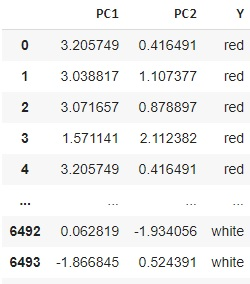


*TIPS:*

Producto escalar en Numpy: $A \cdot B$ = `A.dot(B)`

Recordar que multiplicar una matriz $A$ por la nésima fila de una matriz $B$ es lo mismo que multiplicar algo por la m-ésima columna de $B^T$

In [ ]:
projected_1 = C.dot(vectors.T[0])
projected_2 = C.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = df_wine['wine']
res

,PC1,PC2,Y
0,3.205749,0.416491,red
1,3.038817,1.107377,red
2,3.071657,0.878897,red
3,1.571141,2.112382,red
4,3.205749,0.416491,red
...,...,...,...
6492,0.062819,-1.934056,white
6493,-1.866845,0.524391,white
6494,-0.571089,-0.722606,white
6495,-0.090045,-3.545507,white


Ya tenemos nuestros componentes principales! Ahora nos toca graficar:

###Generamos la visualización:
Generar un scatterplot de Seaborn donde:

* **en x se grafique:** La columna PC1
* **en y se grafique:** La columna PC2 multiplicada por el n (cantidad de datos). 
* se muestre con diferentes colores los puntos según la columna "Y" (tipo de vino).

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


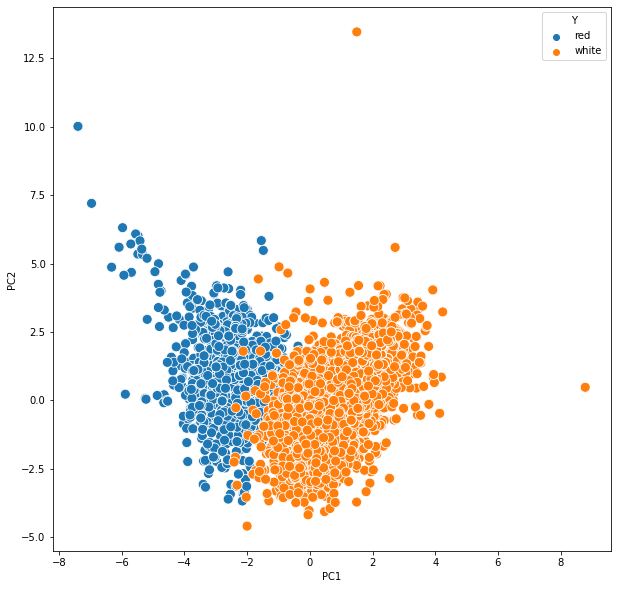

In [ ]:
plt.figure(figsize=(10, 10))
#sns.scatterplot(res['PC1'], res['PC2'] * len(res), hue=res['Y'], s=100)
sns.scatterplot(-res['PC1'], res['PC2'], hue=res['Y'], s=100)

Mirar el gráfico que se obtuvo y compararlo con el obtenido para el PCA hecho con sklearn en el notebook 3:

In [ ]:
#Lo mismo, pero con sklearn, copiado del Notebook 3:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data_pca = df_wine.copy()
data_pca = data_pca.drop(labels = ['quality', 'wine'],axis = 1)
data_pca = StandardScaler().fit_transform(data_pca)
pca = PCA(n_components=3)
pca_results = pca.fit_transform(data_pca)

<Figure size 432x288 with 0 Axes>

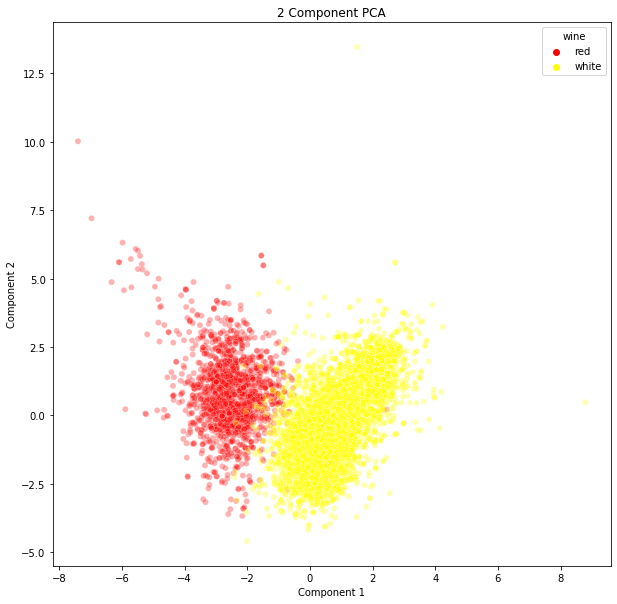

In [ ]:
pca_dataset = pd.DataFrame(data = pca_results, columns = ['component1', 'component2','component3'] )
pca_dataset['wine']=df_wine['wine']
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
sns.scatterplot(x = pca_dataset['component1'], y = pca_dataset['component2'], hue=pca_dataset['wine'],
                alpha=0.3,palette=["red", "yellow"])